Email sent to student1@example.com
Email sent to student9@example.com
Email sent to student10@example.com
Email sent to student11@example.com
Email sent to student13@example.com
Email sent to student14@example.com
Email sent to student15@example.com
Email sent to student16@example.com
Email sent to atharvsankpal799@gmail.com
Email sent to student18@example.com
Email sent to hemantsryadav@gmail.com
Email sent to student20@example.com


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


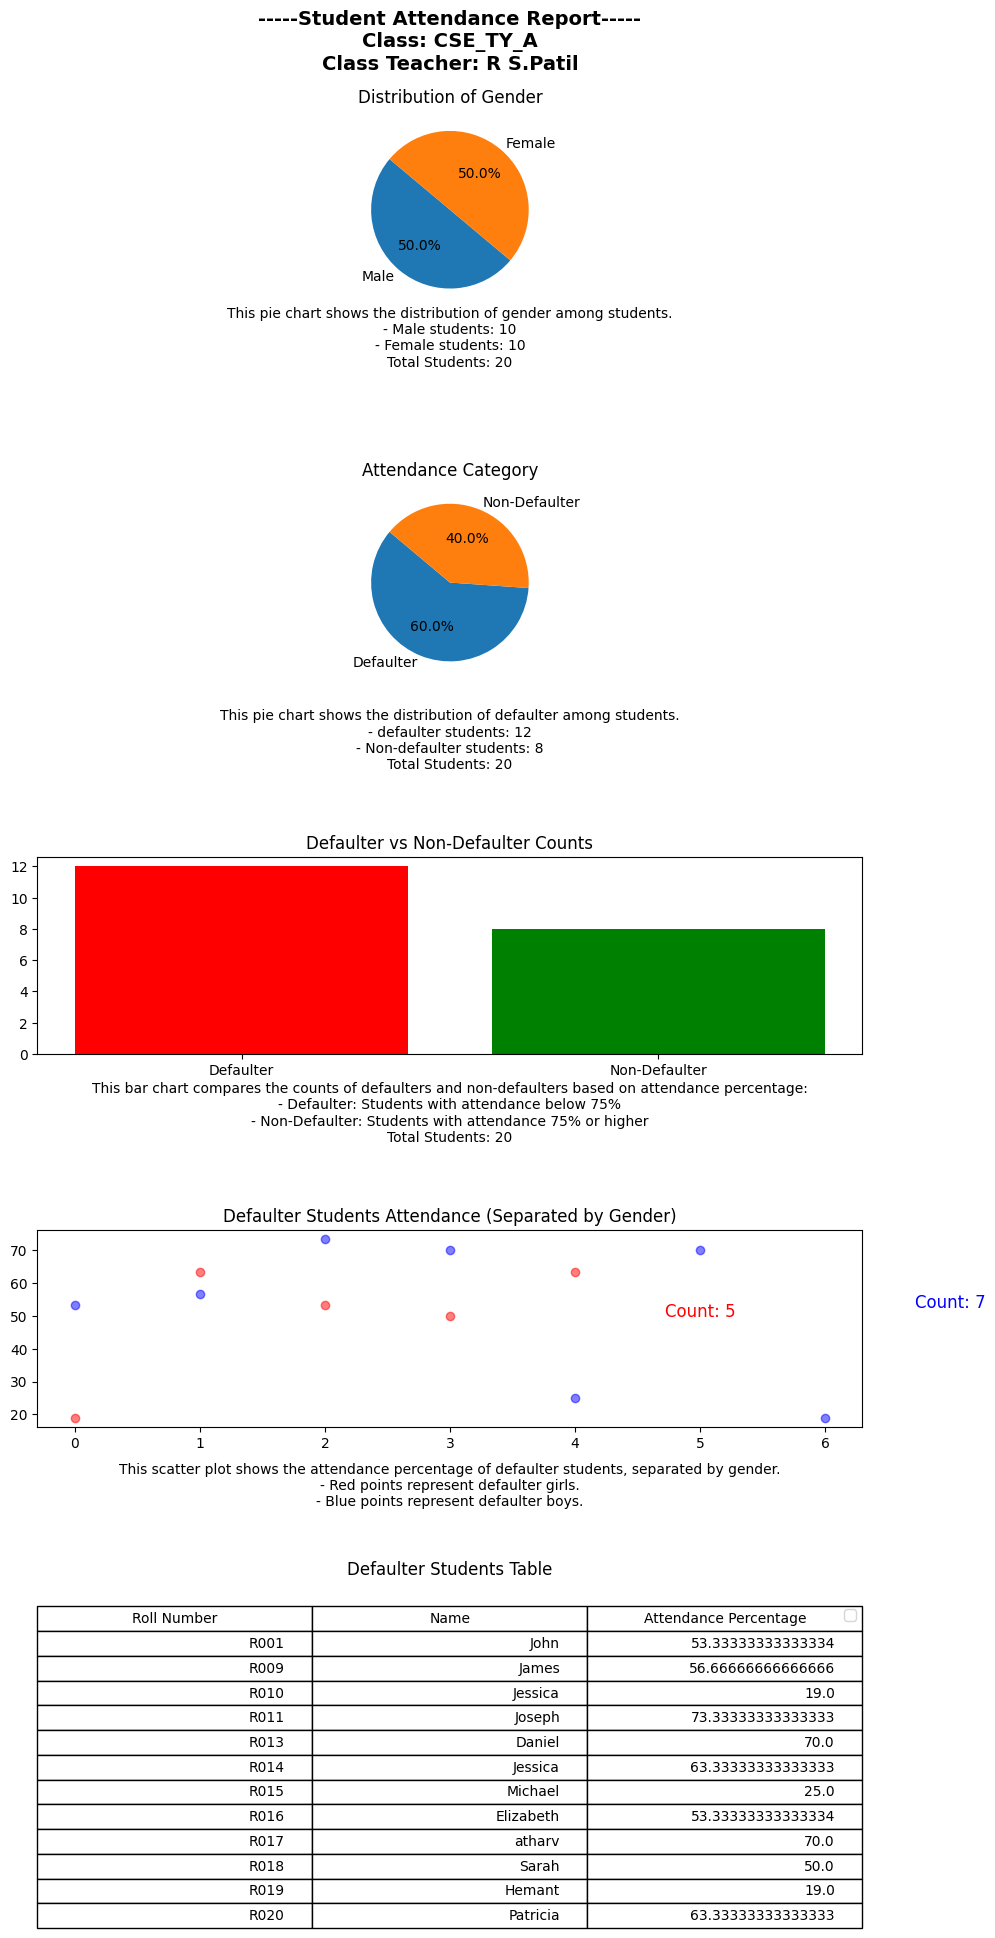

In [1]:
import pandas as pd
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText

from email.mime.base import MIMEBase
from email import encoders
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# --------------------------------------------------categorize_students_attendance---------------------------------------------------------------
def categorize_students_attendance(dataset_path, threshold=75):
    try:
        df = pd.read_excel(dataset_path)
    except FileNotFoundError:
        print("File not found. Please provide a valid file path.")
        return None, None, None, None, None
    except pd.errors.EmptyDataError:
        print("The file is empty.")
        return None, None, None, None, None

    if 'Attendance Percentage' not in df.columns or 'Student Mail ID' not in df.columns:
        print("The dataset is missing required columns.")
        return None, None, None, None, None

    defaulter_count = (df['Attendance Percentage'] < threshold).sum()
    non_defaulter_count = (df['Attendance Percentage'] >= threshold).sum()

    defaulter_students = df[df['Attendance Percentage'] < threshold]
    non_defaulter_students = df[df['Attendance Percentage'] >= threshold]

    defaulter_attendance = df[df['Attendance Percentage'] < threshold]['Attendance Percentage']

    return defaulter_count, non_defaulter_count, defaulter_attendance, defaulter_students, non_defaulter_students

#--------------------------------------------------------------send mail to defaulters--------------------------------------------------------------   

def send_email(receiver_email, message):
    sender_email = "rupalipatil2583@gmail.com"  # Enter your email address
    password = "bmqs mjcj huiw pncy"  # Enter your email password

    # Create a MIME object
    msg = MIMEMultipart()
    msg['From'] = sender_email
    msg['To'] = receiver_email
    msg['Subject'] = "Attendance Defaulter Notification"

    # Add message to the email body
    msg.attach(MIMEText(message, 'plain'))

    # Connect to the SMTP server
    server = smtplib.SMTP('smtp.gmail.com', 587)
    server.starttls()
    server.login(sender_email, password)

    # Send the email
    server.sendmail(sender_email, receiver_email, msg.as_string())
    server.quit()

def send_emails_to_defaulters(dataset_path, threshold=75):
    _, _, _, defaulter_students, _ = categorize_students_attendance(dataset_path, threshold)

    if defaulter_students is None:
        print("Unable to categorize students. Please check the dataset structure.")
        return

    defaulter_emails = defaulter_students['Student Mail ID']

    message = "Dear Student,\n\nThis is to inform you that your attendance is below the threshold. Please ensure to improve it.\n\nRegards,\nYour School/Institution"

    for email in defaulter_emails:
        send_email(email, message)
        print(f"Email sent to {email}")

# Provide the path to your dataset here
dataset_path = "E:\Hackathon project\Attendance\FY_A_ML2.xlsx"

# Call the function to send emails to defaulters
send_emails_to_defaulters(dataset_path)

#---------------------------------------------------------------generate graphs-----------------------------------------------------------------------
import matplotlib.pyplot as plt


df = pd.read_excel("E:\Hackathon project\Attendance\FY_A_ML2.xlsx")
# Create subplots
fig, axs = plt.subplots(5, 1, figsize=(10, 20))  # Adjust figsize as needed

# Display class and class teacher name
class_name = "CSE_TY_A"
class_teacher = "R S.Patil"
class_info_text = f'-----Student Attendance Report-----\nClass: {class_name}\nClass Teacher: {class_teacher}\n'
axs[0].text(0.5, 1.1, class_info_text, fontsize=14, fontweight='bold', horizontalalignment='center', transform=axs[0].transAxes)

# Plot data and add explanations
gender_counts = df['Gender'].value_counts()
axs[0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Gender')
total_students = gender_counts.sum()

explanation_text = f"""
This pie chart shows the distribution of gender among students.
- Male students: {gender_counts['Male']}
- Female students: {gender_counts['Female']}
Total Students: {total_students}
"""
axs[0].text(0.5, -0.15, explanation_text, horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes, wrap=True)



labels = ['Defaulter', 'Non-Defaulter']
defaulter_count = (df['Attendance Percentage'] < 75).sum()
non_defaulter_count = (df['Attendance Percentage'] >= 75).sum()
axs[1].pie([defaulter_count, non_defaulter_count], labels=labels, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Attendance Category')
gender_explanation = f"""
This pie chart shows the distribution of defaulter among students.
- defaulter students: {defaulter_count}
- Non-defaulter students: {non_defaulter_count}
Total Students: {total_students}
"""
axs[1].text(0.5, -0.3, gender_explanation, horizontalalignment='center', verticalalignment='center', transform=axs[1].transAxes,wrap=True)

attendance_counts = [defaulter_count, non_defaulter_count]
labels = ['Defaulter', 'Non-Defaulter']
defaulter_count = (df['Attendance Percentage'] < 75).sum()
non_defaulter_count = (df['Attendance Percentage'] >= 75).sum()
axs[2].bar(labels, [defaulter_count, non_defaulter_count], color=['red', 'green'])
axs[2].set_title('Defaulter vs Non-Defaulter Counts')
defaulter_explanation = """
This bar chart compares the counts of defaulters and non-defaulters based on attendance percentage:
- Defaulter: Students with attendance below 75%
- Non-Defaulter: Students with attendance 75% or higher
Total Students: {}
""".format(sum(attendance_counts))
axs[2].text(0.5, -0.3, defaulter_explanation, horizontalalignment='center', verticalalignment='center', transform=axs[2].transAxes,wrap=True)


defaulter_student = df[df['Attendance Percentage'] < 75]
non_defaulter_student = df[df['Attendance Percentage'] >= 75]
girls = defaulter_student[defaulter_student['Gender'] == 'Female']
boys = defaulter_student[defaulter_student['Gender'] == 'Male']
axs[3].scatter(range(len(girls)), girls['Attendance Percentage'], color='red', label='Defaulter (Girls)', alpha=0.5)
total_students = gender_counts.sum()
explanation_scatter = """
This scatter plot shows the attendance percentage of defaulter students, separated by gender.
- Red points represent defaulter girls.
- Blue points represent defaulter boys.
"""
axs[3].scatter(range(len(boys)), boys['Attendance Percentage'], color='blue', label='Defaulter (Boys)', alpha=0.5)
axs[3].text(len(girls), girls['Attendance Percentage'].mean(), f'Count: {len(girls)}', fontsize=12, color='red', ha='center')
axs[3].text(len(boys), boys['Attendance Percentage'].mean(), f'Count: {len(boys)}', fontsize=12, color='blue', ha='center')
axs[3].set_title('Defaulter Students Attendance (Separated by Gender)')
plt.legend()
axs[3].text(0.5, -0.3, explanation_scatter , horizontalalignment='center', verticalalignment='center', transform=axs[3].transAxes,wrap=True)

# Add the table of defaulter students
defaulter_students = df[df['Attendance Percentage'] < 75]
table_data = defaulter_students[['Roll Number','Name', 'Attendance Percentage']]

axs[4].axis('off')  # Hide axis for the table subplot
table = axs[4].table(cellText=table_data.values, colLabels=table_data.columns, loc='upper center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)  # Adjust table scaling as needed
axs[4].set_title('Defaulter Students Table', fontsize=12, pad=20)  # Set title for the table with adjusted font size
axs[4].title.set_position([.5, 1.1])  # Adjust title position


plt.legend()
# Adjust layout
plt.tight_layout()

# Save plots to a PDF file
# pdf_filename = "plots_with_explanation.pdf"
# plt.savefig(pdf_filename)

pdf_filename = f"Attendance_Report_{class_name}.pdf"
with PdfPages(pdf_filename) as pdf:
    plt.savefig(pdf, format='pdf')
    
#-------------------------------------------------send report to teacher via mail-------------------------------------------------------------------

sender_email = "rupalipatil2583@gmail.com"  # Enter your email address
password = "bmqs mjcj huiw pncy"
receiver_email = "hemantsryadav@gmail.com"
message = "Please find attached the graph report."
msg = MIMEMultipart()
msg['From'] = sender_email
msg['To'] = receiver_email
msg['Subject'] = "Graph Report"


# Add message to the email body
msg.attach(MIMEText(message, 'plain'))

    # Attach the PDF file to the email
with open(pdf_filename, "rb") as attachment:
    part = MIMEBase("application", "octet-stream")
    part.set_payload(attachment.read())
    
encoders.encode_base64(part)
part.add_header("Content-Disposition",f"attachment; filename= {pdf_filename}",)
msg.attach(part)

    # Connect to the SMTP server
server = smtplib.SMTP('smtp.gmail.com', 587)
server.starttls()
server.login(sender_email, password)

    # Send the email
server.sendmail(sender_email,receiver_email , msg.as_string())
server.quit()


# Show the plots (optional)
plt.show()
